# Flujo en la zona de interés

## Modelo detallado

Este notebook servirá para describir el análisis realizado sobre los videos de la zona de interés.

In [1]:
import osmnx as ox
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

Se extrae un modelo más detallado para colocar la información de los videos.

Se coloca el punto a partir del cual se generará el modelo. Se coloca de la forma (latitud, longitud). 

In [2]:
# from a point
point = (-0.206412, -78.499363)

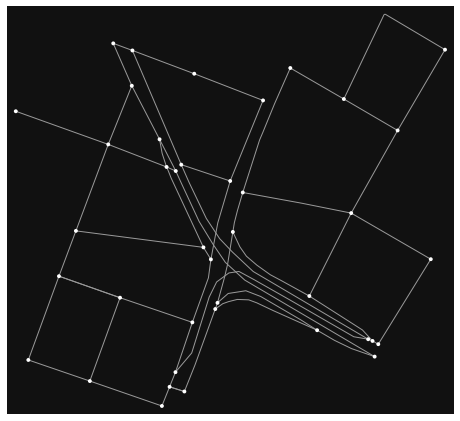

In [3]:
graph = ox.graph_from_point(point, dist=250, network_type="drive")
# Project the graph
graph_proj = ox.project_graph(graph)
# plot the graph
fig, ax = ox.plot_graph(graph_proj)

Hay que identificar el número de los nodos involucrados.

In [4]:
pos = {}
labs_dict = {}
lab2graph = {}
for idx,node in enumerate(graph.nodes):
    pos[node]=(graph.nodes[node]['x'],graph.nodes[node]['y'])
    labs_dict[node]=idx
    lab2graph[idx] = node
    

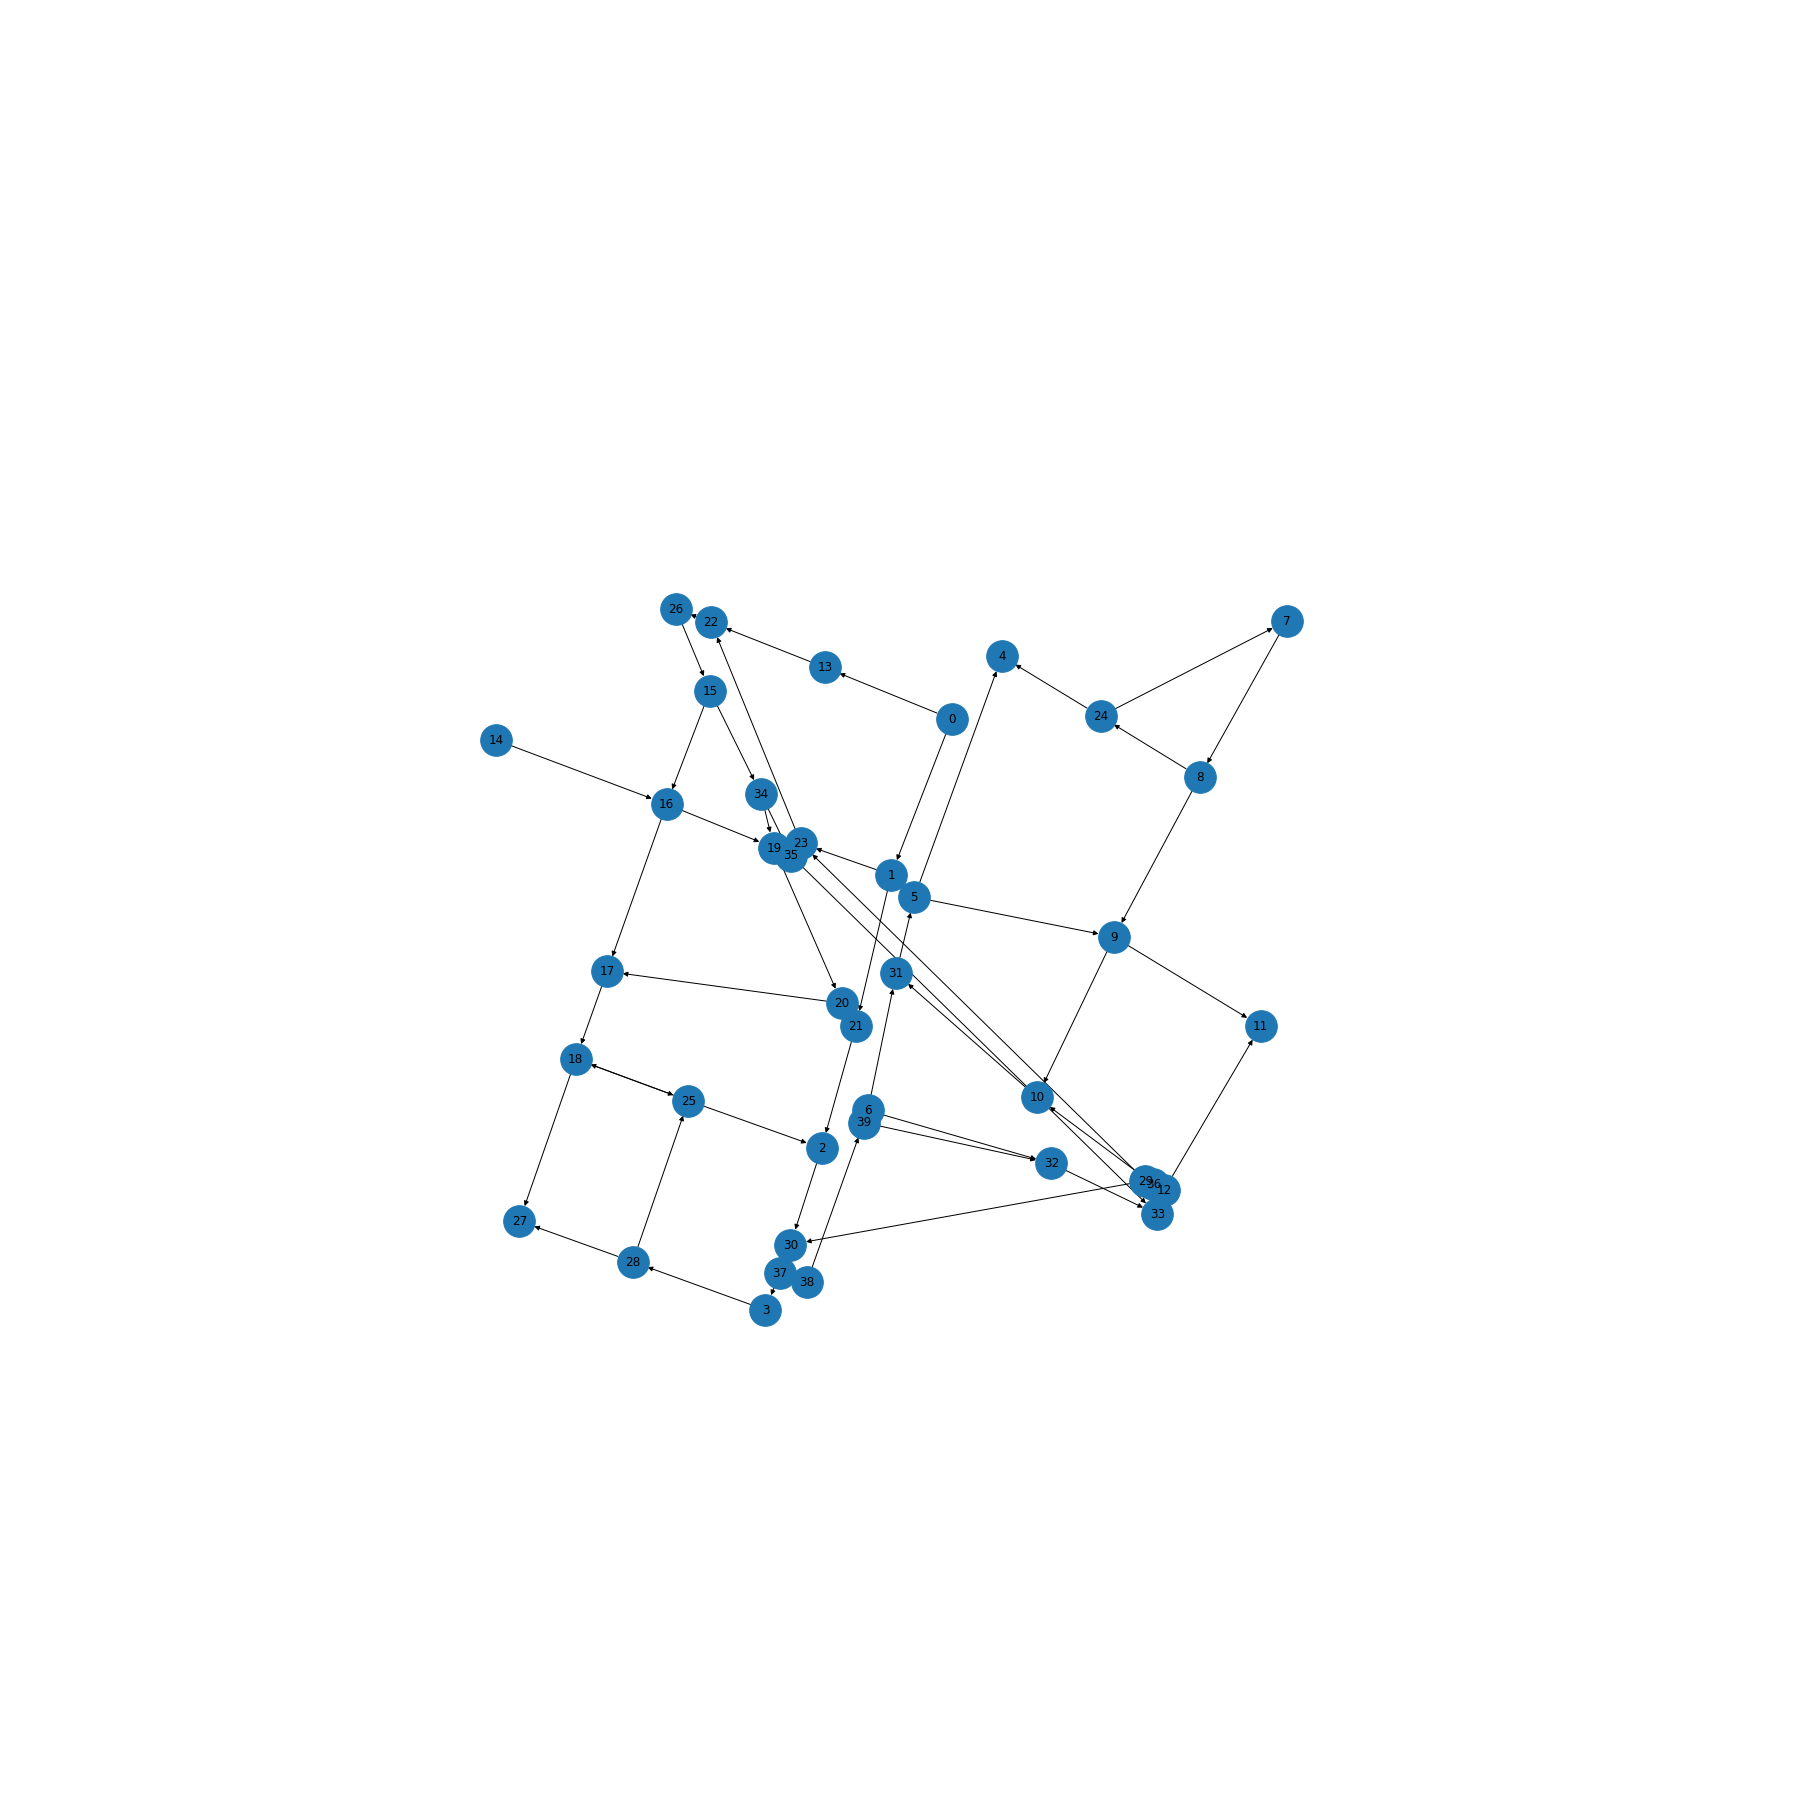

In [5]:
plt.figure(figsize=(25,25))
nx.draw(graph,pos,node_size=1000,
            labels=labs_dict)

## Nodos involucrados

Se usará el id sur_or_ab para este ejemplo.

In [20]:
graph.edges[(lab2graph[6], lab2graph[31], 0)]

{'osmid': 431722531,
 'oneway': True,
 'lanes': '2',
 'name': 'Avenida 10 de Agosto',
 'highway': 'primary',
 'maxspeed': '50',
 'length': 79.104,
 'geometry': <shapely.geometry.linestring.LineString at 0x1aa70577af0>}

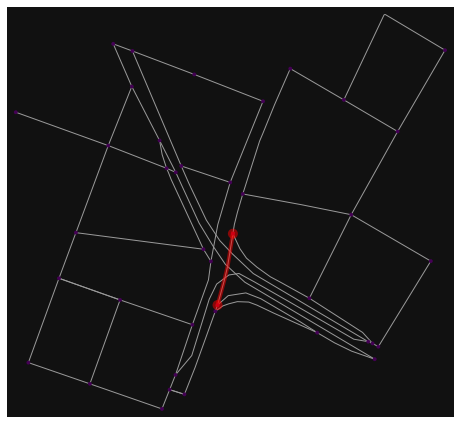

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [27]:
colors = [0]*len(graph.nodes)
ox.plot_graph_route(graph,[lab2graph[6],lab2graph[31]],node_color=colors)


In [29]:
sur_or_ab_data = pd.read_csv('../detector_flujo_urbano/conteo_sur_or_ab.csv')

In [30]:
sur_or_ab_data

,num_ligeros,num_pesados,num_motos,num_personas,num_taxis
0,16,1,43,36,7


El contador no es muy efectivo respecto a personas y motocicletas, así que sólo se tomará en cuenta los resultados obtenidos sobre vehículos ligeros, pesados y taxis.

In [31]:
cantidades = [sur_or_ab_data.iloc[0][0], sur_or_ab_data.iloc[0][1], sur_or_ab_data.iloc[0][4]]

In [32]:
cantidades

[16, 1, 7]

In [33]:
porcentajes = np.array(cantidades)

In [34]:
porcentajes = porcentajes/porcentajes.sum()

In [35]:
porcentajes

array([0.66666667, 0.04166667, 0.29166667])

Con los porcentajes se puede realizar una representación acerca de qué vehículo es más común.

## Comparación gráfica

Se puede realizar una comparación gráfica de los vehículos más abundantes en las rutas. Esto se realizará asignando un color a cada tipo de vehículo:

* Ligero: cyan
* Pesado: rojo
* Taxi: amarillo

### Ligeros

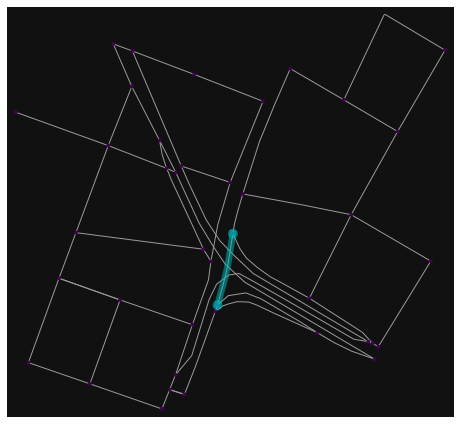

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [52]:
ox.plot_graph_route(graph,[lab2graph[6],lab2graph[31]],
                    node_color = colors,
                    route_linewidth = porcentajes[0]*10,
                    route_color = 'c')

### Pesados

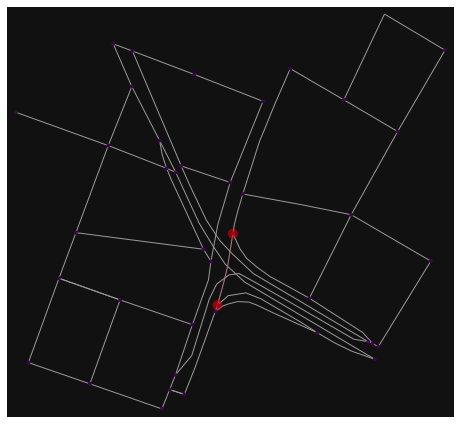

In [79]:
fig,ax = ox.plot_graph_route(graph,[lab2graph[6],lab2graph[31]],
                    node_color = colors,
                    route_linewidth = porcentajes[1]*10,
                    route_color = 'r')

### Taxis

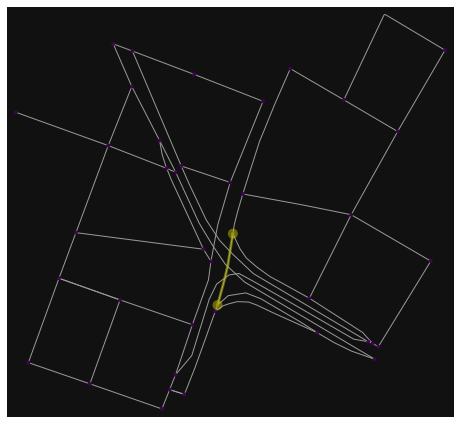

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [88]:
ox.plot_graph_route(graph,[lab2graph[6],lab2graph[31]],
                    node_color = colors,
                    route_linewidth = porcentajes[2]*10,
                    route_color = 'y')

El ancho de la línea refleja la cantidad de vehículos. Se puede observar que el vehículo más abundante en esta ruta son los autos ligeros, mientras que los vehículos pesados son muy pocos; los taxis mantienen un número intermedio.

In [94]:
#mostrará la cantidad de vehículos que existen 
def show_vhq_type(per,graph,nodes,size = (5,5)):
    #no muestra otros nodos
    colors = [0] * len(graph.nodes)
    #colores para cada tipo de vehículo
    route_colors = ['c','r','y','b','g']*10
    #gráfico por cada tipo de vehículo
    for i in range(len(per)):
        fig, ax =ox.plot_graph_route(graph,nodes,
                            node_color = colors,
                            route_linewidth = per[i]*10, #uso de los porcentajes
                            route_color = route_colors[i],
                            figsize=size)

Esta función permitirá generalizar el análisis gráfico con los demás ids.

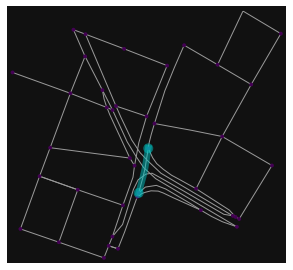

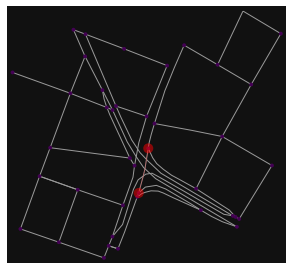

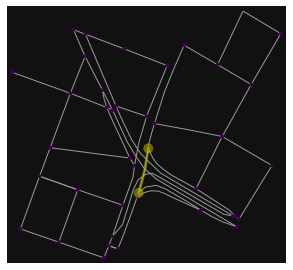

In [95]:
show_vhq_type(porcentajes,graph,[lab2graph[6],lab2graph[31]])

Se guarda el modelo para usarlo más adelante.

In [71]:
a = graph
with open('modelos/ROI_OSMNX.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)